<a href="https://www.kaggle.com/code/surya11singh/rain-prediction-logistic-regression?scriptVersionId=224770494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.shape

(145460, 23)

In [6]:
'''dropping rows where RainToday & RainTomorrow are null 
as they will not contribute to the predictive power of the algorithm'''

raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)
raw_df.shape

(140787, 23)

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [8]:
px.histogram(raw_df, x = 'Location', title = 'Location vs. Rainy Days', color = 'RainToday')

In [9]:
px.histogram(raw_df, x = 'RainTomorrow', title = 'Rain Tomorrow vs. Rain Today', color = 'RainToday')

**Class Imbalance can be observed from the above plot**

In [10]:
px.scatter(raw_df.sample(2000), x = 'MinTemp', y = 'MaxTemp', title = 'Min Temp. vs. Max Temp.', color = 'RainToday')

In [11]:
px.histogram(raw_df, x = 'Temp3pm', title = 'Temperature at 3 PM vs. Rain Tomorrow', color = 'RainTomorrow')

In [12]:
px.scatter(raw_df.sample(2000), x = 'Temp3pm', y = 'Humidity3pm', title = 'Temp. (3pm) vs. Humidity (3pm)', color = 'RainTomorrow')

In [13]:
#taking a 10% sample of data to work on
use_sample = True
sample_fraction = 0.1

if use_sample:
    raw_df = raw_df.sample(frac = sample_fraction).copy()

raw_df.shape

(14079, 23)

In [14]:
#performing a train, validation, test set split on the sample working data
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [15]:
print(f"train_df: {train_df.shape}")
print(f"val_df: {val_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (8447, 23)
val_df: (2816, 23)
test_df: (2816, 23)


<Axes: title={'center': '# of rows per year'}, xlabel='Date', ylabel='count'>

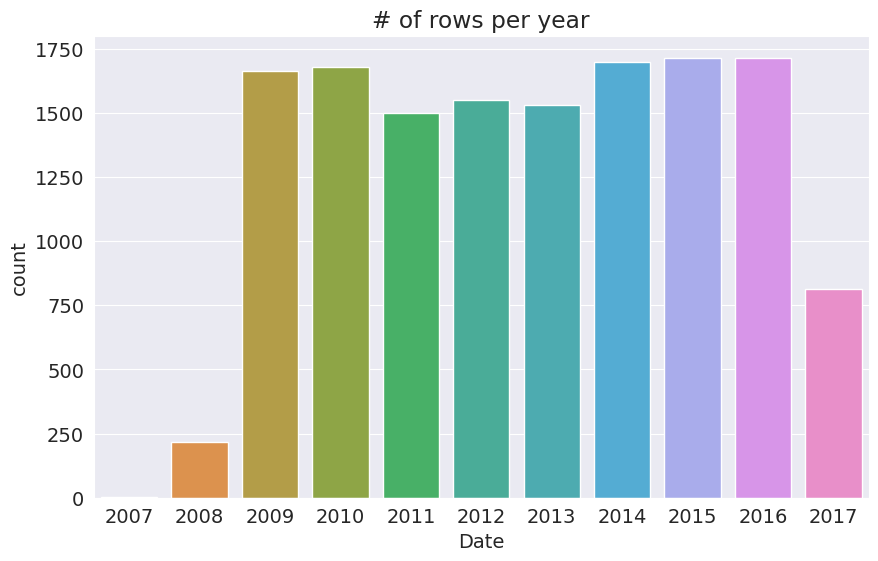

In [16]:
plt.title('# of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [17]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

print(f"train_df: {train_df.shape}")
print(f"val_df: {val_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (9839, 23)
val_df: (1715, 23)
test_df: (2525, 23)


In [18]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1152,2012-02-26,Albury,17.6,25.5,1.4,NaN,NaN,NE,37.0,SE,...,91.0,100.0,1018.3,1014.9,7.0,8.0,18.6,22.0,Yes,Yes
70447,2009-02-24,Mildura,11.9,28.6,0.0,9.4,12.3,S,41.0,SE,...,52.0,15.0,1018.9,1016.6,0.0,3.0,14.6,26.0,No,No
6871,2011-05-03,Cobar,8.6,22.5,0.0,3.0,NaN,SW,30.0,S,...,65.0,43.0,1016.3,1014.6,1.0,7.0,15.8,21.0,No,Yes
52717,2010-09-17,MountGinini,-5.2,8.8,0.0,NaN,NaN,SW,59.0,S,...,23.0,43.0,NaN,NaN,NaN,NaN,3.0,7.7,No,No
115983,2012-10-25,PearceRAAF,12.3,26.8,0.0,NaN,12.7,ENE,57.0,E,...,40.0,22.0,1024.5,1020.3,0.0,0.0,18.4,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125553,2013-12-25,SalmonGums,11.5,31.0,0.0,NaN,NaN,SSE,35.0,SE,...,42.0,18.0,NaN,NaN,NaN,NaN,20.8,29.3,No,No
24379,2009-08-09,Penrith,1.5,17.8,0.0,NaN,NaN,N,20.0,SE,...,97.0,36.0,NaN,NaN,NaN,NaN,5.9,17.3,No,No
69149,2014-01-29,Melbourne,18.4,25.1,4.6,16.8,7.7,SSW,46.0,SSE,...,70.0,45.0,1018.3,1017.5,8.0,2.0,18.6,23.7,Yes,No
136621,2010-06-04,AliceSprings,3.1,18.6,0.0,3.8,NaN,E,33.0,WNW,...,64.0,37.0,1024.4,1021.1,1.0,NaN,11.0,18.3,No,No


In [19]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
143259,2015-10-12,Katherine,23.5,38.0,0.0,10.2,NaN,ENE,35.0,NW,...,65.0,NaN,1017.2,1011.3,0.0,NaN,29.5,NaN,No,No
26466,2015-07-26,Penrith,8.2,20.4,0.0,NaN,NaN,NW,57.0,NNE,...,44.0,31.0,NaN,NaN,NaN,NaN,14.7,19.3,No,No
74094,2015-01-22,Nhil,15.1,37.0,0.0,NaN,NaN,SW,54.0,SE,...,68.0,25.0,1010.5,1006.0,NaN,NaN,20.0,35.1,No,No
83221,2015-05-02,Dartmoor,12.2,18.3,1.0,2.2,5.4,WNW,56.0,NNW,...,NaN,NaN,1015.2,1014.3,NaN,NaN,14.7,18.0,No,Yes
51380,2015-08-14,Tuggeranong,-3.9,15.5,0.0,NaN,NaN,NNW,24.0,WSW,...,83.0,53.0,1025.9,1023.6,NaN,NaN,3.5,15.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74148,2015-03-17,Nhil,12.5,32.1,0.0,NaN,NaN,NW,63.0,NNE,...,28.0,27.0,1002.5,999.1,NaN,NaN,22.2,30.0,No,No
60606,2015-11-28,Bendigo,8.4,25.9,0.0,NaN,NaN,S,31.0,SSE,...,53.0,29.0,1017.7,1013.7,NaN,NaN,14.9,23.0,No,No
48163,2015-02-17,Canberra,15.6,32.5,0.0,NaN,NaN,W,41.0,ENE,...,67.0,31.0,1017.6,1013.9,1.0,NaN,22.1,31.2,No,No
26606,2015-12-13,Penrith,17.2,27.4,0.0,NaN,NaN,ENE,30.0,NNE,...,72.0,45.0,NaN,NaN,NaN,NaN,19.6,26.7,No,No


In [20]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74595,2016-06-06,Nhil,7.0,14.9,0.6,NaN,NaN,WSW,54.0,WNW,...,89.0,75.0,1001.8,1001.8,NaN,NaN,10.2,14.0,No,Yes
20592,2016-01-16,NorahHead,14.8,24.1,13.4,NaN,NaN,S,63.0,SSE,...,56.0,60.0,1025.9,1025.1,NaN,NaN,21.8,22.1,Yes,Yes
61089,2017-03-25,Bendigo,17.2,27.8,0.2,NaN,NaN,SSE,26.0,ESE,...,82.0,61.0,1013.6,1012.0,8.0,NaN,18.9,25.5,No,No
108146,2016-04-27,Woomera,17.4,31.3,0.0,11.8,4.1,NNW,57.0,N,...,23.0,14.0,1016.6,1013.4,7.0,7.0,22.3,29.5,No,No
8592,2016-03-17,Cobar,18.7,29.9,35.0,3.0,NaN,ENE,33.0,E,...,70.0,49.0,1012.1,1007.9,2.0,7.0,21.9,29.3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,2016-10-31,Portland,6.4,14.4,6.4,NaN,NaN,WSW,74.0,W,...,76.0,63.0,1012.1,1012.7,8.0,4.0,8.4,13.4,Yes,Yes
139066,2017-05-12,AliceSprings,3.1,27.3,0.0,NaN,NaN,N,28.0,NaN,...,18.0,11.0,1020.0,1014.9,NaN,NaN,15.1,26.3,No,No
61115,2017-04-20,Bendigo,14.8,23.2,0.0,NaN,NaN,ENE,35.0,ENE,...,53.0,48.0,1027.0,1022.8,1.0,1.0,19.1,22.9,No,Yes
51796,2016-10-03,Tuggeranong,9.0,14.2,9.8,NaN,NaN,W,57.0,WNW,...,66.0,50.0,997.9,999.4,NaN,NaN,13.0,12.2,Yes,Yes


In [21]:
#identifying input and target columns
